# Exam on Artificial Neural Networks (ANN)

Welcome the Artificial Neural Networks (ANN) practical exam. In this exam, you will work on a classification task to predict the outcome of incidents involving buses. You are provided with a dataset that records breakdowns and delays in bus operations. Your task is to build, train, and evaluate an ANN model.

---

## Dataset Overview

### **Dataset:**
* Just run the command under the `Load Data` section to get the data downloaded and unzipped or you can access it [here](https://drive.google.com/file/d/1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-/view?usp=sharing)

### **Dataset Name:** Bus Breakdown and Delays

### **Description:**  
The dataset contains records of incidents involving buses that were either running late or experienced a breakdown. Your task is to predict whether the bus was delayed or had a breakdown based on the features provided.

### **Features:**
The dataset contains the following columns:

- `School_Year`
- `Busbreakdown_ID`
- `Run_Type`
- `Bus_No`
- `Route_Number`
- `Reason`
- `Schools_Serviced`
- `Occurred_On`
- `Created_On`
- `Boro`
- `Bus_Company_Name`
- `How_Long_Delayed`
- `Number_Of_Students_On_The_Bus`
- `Has_Contractor_Notified_Schools`
- `Has_Contractor_Notified_Parents`
- `Have_You_Alerted_OPT`
- `Informed_On`
- `Incident_Number`
- `Last_Updated_On`
- `Breakdown_or_Running_Late` (Target Column)
- `School_Age_or_PreK`

## Load Data

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
#https://drive.google.com/file/d/1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-/view?usp=sharing
!pip install gdown
!gdown --id 1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Failed to retrieve file url:

	Too many users have viewed or downloaded this file recently. Please
	try accessing the file again later. If the file you are trying to
	access is particularly large or is shared with many people, it may
	take up to 24 hours to be able to view or download the file. If you
	still can't access a file after 24 hours, contact your domain
	administrator.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-

but Gdown can't. Please check connections and permissions.


## Importing Libraries

In [7]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder , StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTEENN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Conv2D, Flatten,Dropout,MaxPooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,confusion_matrix,classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

## Exploratory Data Analysis (EDA)
This could include:
* **Inspect the dataset**

* **Dataset structure**

* **Summary statistics**

* **Check for missing values**

* **Distribution of features**

* **Categorical feature analysis**

* **Correlation matrix**

* **Outlier detection**

And add more as needed!

In [12]:
df=pd.read_csv('/content/drive/MyDrive/SADIA T5/Bus_Breakdown_and_Delays.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [14]:
df.head()

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
0,2015-2016,1224901,Pre-K/EI,811,1,Other,C353,10/26/2015 08:30:00 AM,10/26/2015 08:40:00 AM,Bronx,...,10MINUTES,5,Yes,Yes,No,10/26/2015 08:40:00 AM,NaN,10/26/2015 08:40:39 AM,Running Late,Pre-K
1,2015-2016,1225098,Pre-K/EI,9302,1,Heavy Traffic,C814,10/27/2015 07:10:00 AM,10/27/2015 07:11:00 AM,Bronx,...,25 MINUTES,3,Yes,Yes,No,10/27/2015 07:11:00 AM,NaN,10/27/2015 07:11:22 AM,Running Late,Pre-K
2,2015-2016,1215800,Pre-K/EI,358,2,Heavy Traffic,C195,09/18/2015 07:36:00 AM,09/18/2015 07:38:00 AM,Bronx,...,15 MINUTES,12,Yes,Yes,Yes,09/18/2015 07:38:00 AM,NaN,09/18/2015 07:38:44 AM,Running Late,Pre-K
3,2015-2016,1215511,Pre-K/EI,331,2,Other,C178,09/17/2015 08:08:00 AM,09/17/2015 08:12:00 AM,Bronx,...,10 minutes,11,Yes,Yes,Yes,09/17/2015 08:12:00 AM,NaN,09/17/2015 08:12:08 AM,Running Late,Pre-K
4,2015-2016,1215828,Pre-K/EI,332,2,Other,S176,09/18/2015 07:39:00 AM,09/18/2015 07:45:00 AM,Bronx,...,10MINUTES,12,Yes,Yes,No,09/18/2015 07:45:00 AM,NaN,09/18/2015 07:56:40 AM,Running Late,Pre-K


In [13]:
df.tail()

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
147967,2016-2017,1338452,Pre-K/EI,9345,2,Heavy Traffic,C530,04/05/2017 08:00:00 AM,04/05/2017 08:10:00 AM,Bronx,...,15-20,7,Yes,Yes,No,04/05/2017 08:10:00 AM,NaN,04/05/2017 08:10:15 AM,Running Late,Pre-K
147968,2016-2017,1341521,Pre-K/EI,0001,5,Heavy Traffic,C579,04/24/2017 07:42:00 AM,04/24/2017 07:44:00 AM,Bronx,...,20 MINS,0,Yes,Yes,No,04/24/2017 07:44:00 AM,NaN,04/24/2017 07:44:15 AM,Running Late,Pre-K
147969,2016-2017,1353044,Special Ed PM Run,GC0112,X928,Heavy Traffic,09003,05/25/2017 04:22:00 PM,05/25/2017 04:28:00 PM,Bronx,...,20-25MINS,0,Yes,Yes,Yes,05/25/2017 04:28:00 PM,90323827,05/25/2017 04:34:36 PM,Running Late,School-Age
147970,2016-2017,1353045,Special Ed PM Run,5525D,Q920,Won`t Start,24457,05/25/2017 04:27:00 PM,05/25/2017 04:30:00 PM,Queens,...,NaN,0,Yes,Yes,No,05/25/2017 04:30:00 PM,NaN,05/25/2017 04:30:07 PM,Breakdown,School-Age
147971,2016-2017,1353046,Project Read PM Run,2530,K617,Other,21436,05/25/2017 04:36:00 PM,05/25/2017 04:37:00 PM,Brooklyn,...,45min,7,Yes,Yes,Yes,05/25/2017 04:37:00 PM,NaN,05/25/2017 04:37:37 PM,Running Late,School-Age


In [15]:
df.sample()

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
25135,2015-2016,1244960,Special Ed PM Run,40102,K804,Won`t Start,20200,01/25/2016 04:55:00 PM,01/25/2016 04:57:00 PM,Brooklyn,...,NaN,4,Yes,Yes,No,01/25/2016 04:57:00 PM,NaN,01/25/2016 04:57:19 PM,Breakdown,School-Age


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147972 entries, 0 to 147971
Data columns (total 13 columns):
 #   Column                           Non-Null Count   Dtype
---  ------                           --------------   -----
 0   Run_Type                         147972 non-null  int64
 1   Bus_No                           147972 non-null  int64
 2   Route_Number                     147972 non-null  int64
 3   Reason                           147972 non-null  int64
 4   Schools_Serviced                 147972 non-null  int64
 5   Boro                             147972 non-null  int64
 6   Bus_Company_Name                 147972 non-null  int64
 7   How_Long_Delayed                 147972 non-null  int64
 8   Number_Of_Students_On_The_Bus    147972 non-null  int64
 9   Has_Contractor_Notified_Schools  147972 non-null  int64
 10  Has_Contractor_Notified_Parents  147972 non-null  int64
 11  Have_You_Alerted_OPT             147972 non-null  int64
 12  Breakdown_or_Running_Late     

In [16]:
df.describe()

,Busbreakdown_ID,Number_Of_Students_On_The_Bus
count,1.479720e+05,147972.000000
mean,1.287779e+06,3.590071
std,4.324338e+04,55.365859
min,1.212681e+06,0.000000
25%,1.250438e+06,0.000000
50%,1.287844e+06,0.000000
75%,1.325191e+06,4.000000
max,1.362605e+06,9007.000000


In [17]:
fig = fisize =(8,10)
fig = px.box(df,x='Number_Of_Students_On_The_Bus')
fig.show()

In [18]:
q1=df['Number_Of_Students_On_The_Bus'].quantile(0.25)
q3=df['Number_Of_Students_On_The_Bus'].quantile(0.75)
iqr = q3 - q1

In [19]:
lower = q1 - (1.5 * iqr)
upper = q3 +(1.5 * iqr)

outilers =df.loc[((df['Number_Of_Students_On_The_Bus'] > upper ) | (df['Number_Of_Students_On_The_Bus']< lower )) ]

In [20]:
df.isnull().sum()

School_Year                             0
Busbreakdown_ID                         0
Run_Type                               89
Bus_No                                  0
Route_Number                           88
Reason                                102
Schools_Serviced                        0
Occurred_On                             0
Created_On                              0
Boro                                 6318
Bus_Company_Name                        0
How_Long_Delayed                    21630
Number_Of_Students_On_The_Bus           0
Has_Contractor_Notified_Schools         0
Has_Contractor_Notified_Parents         0
Have_You_Alerted_OPT                    0
Informed_On                             0
Incident_Number                    142340
Last_Updated_On                         0
Breakdown_or_Running_Late               0
School_Age_or_PreK                      0
dtype: int64

In [21]:
df["Run_Type"].unique()

array(['Pre-K/EI', 'Special Ed AM Run', 'General Ed AM Run',
       'Special Ed PM Run', 'General Ed PM Run', 'Special Ed Field Trip',
       'General Ed Field Trip', nan, 'Project Read PM Run',
       'Project Read AM Run', 'Project Read Field Trip'], dtype=object)

In [22]:
df['Run_Type'].fillna(df['Run_Type'].mode()[0],inplace =True)

In [23]:
df["Route_Number"].unique()

array(['1', '2', 'P640', ..., '012', '29AM', '1409B'], dtype=object)

In [24]:
df['Route_Number'].fillna(df['Route_Number'].mode()[0],inplace =True)

In [25]:
df["Reason"].unique()

array(['Other', 'Heavy Traffic', 'Flat Tire', 'Mechanical Problem',
       'Delayed by School', 'Problem Run', 'Late return from Field Trip',
       'Won`t Start', 'Weather Conditions', 'Accident', nan], dtype=object)

In [26]:
df['Reason'].fillna(df['Reason'].mode()[0],inplace =True)

In [27]:
df["Boro"].unique()

array(['Bronx', nan, 'Queens', 'Brooklyn', 'Nassau County', 'Manhattan',
       'Westchester', 'Staten Island', 'All Boroughs', 'Rockland County',
       'Connecticut', 'New Jersey'], dtype=object)

In [28]:
df['Boro'].fillna(df['Boro'].mode()[0],inplace =True)

In [29]:
df["How_Long_Delayed"].unique()

array(['10MINUTES', '25 MINUTES', '15 MINUTES', ..., '40 -50 MIN',
       '80 MIN', '45 MINIUTE'], dtype=object)

In [30]:
df['How_Long_Delayed'].fillna(df['How_Long_Delayed'].mode()[0],inplace=True)

In [31]:
df["Incident_Number"].unique()

array([nan, '2725956', '2776550', ..., '90330033', '90333015', '90323827'],
      dtype=object)

In [32]:
df.drop('Incident_Number',axis=1,inplace=True)

In [33]:
df.isnull().sum()

School_Year                        0
Busbreakdown_ID                    0
Run_Type                           0
Bus_No                             0
Route_Number                       0
Reason                             0
Schools_Serviced                   0
Occurred_On                        0
Created_On                         0
Boro                               0
Bus_Company_Name                   0
How_Long_Delayed                   0
Number_Of_Students_On_The_Bus      0
Has_Contractor_Notified_Schools    0
Has_Contractor_Notified_Parents    0
Have_You_Alerted_OPT               0
Informed_On                        0
Last_Updated_On                    0
Breakdown_or_Running_Late          0
School_Age_or_PreK                 0
dtype: int64

In [34]:
df.drop('School_Year',axis=1,inplace=True)

In [35]:
df.drop('Busbreakdown_ID',axis=1,inplace=True)

In [36]:
df.drop('Created_On', axis=1,inplace=True)

In [37]:
df.drop('Last_Updated_On',axis=1,inplace=True)

In [38]:
df.drop('Informed_On',axis=1,inplace=True)

In [39]:
df.drop('Occurred_On',axis=1,inplace=True)

In [40]:
df.drop('School_Age_or_PreK',axis=1,inplace=True)

In [41]:
df.columns

Index(['Run_Type', 'Bus_No', 'Route_Number', 'Reason', 'Schools_Serviced',
       'Boro', 'Bus_Company_Name', 'How_Long_Delayed',
       'Number_Of_Students_On_The_Bus', 'Has_Contractor_Notified_Schools',
       'Has_Contractor_Notified_Parents', 'Have_You_Alerted_OPT',
       'Breakdown_or_Running_Late'],
      dtype='object')

In [42]:
cat_column=df.select_dtypes(include='object').columns
label_encoder=LabelEncoder()
for col in cat_column:
  df[col]=label_encoder.fit_transform(df[col])

In [43]:
df.shape
# row 147972 column 20

(147972, 13)

In [44]:
df.head()

,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Boro,Bus_Company_Name,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Breakdown_or_Running_Late
0,3,7481,77,6,5003,1,27,191,5,1,1,0,1
1,3,8114,77,3,5071,1,27,837,3,1,1,0,1
2,3,4662,209,3,4969,1,27,335,12,1,1,1,1
3,3,4547,209,6,4968,1,27,110,11,1,1,1,1
4,3,4554,209,6,5149,1,27,191,12,1,1,0,1


In [45]:
corr=df.corr()

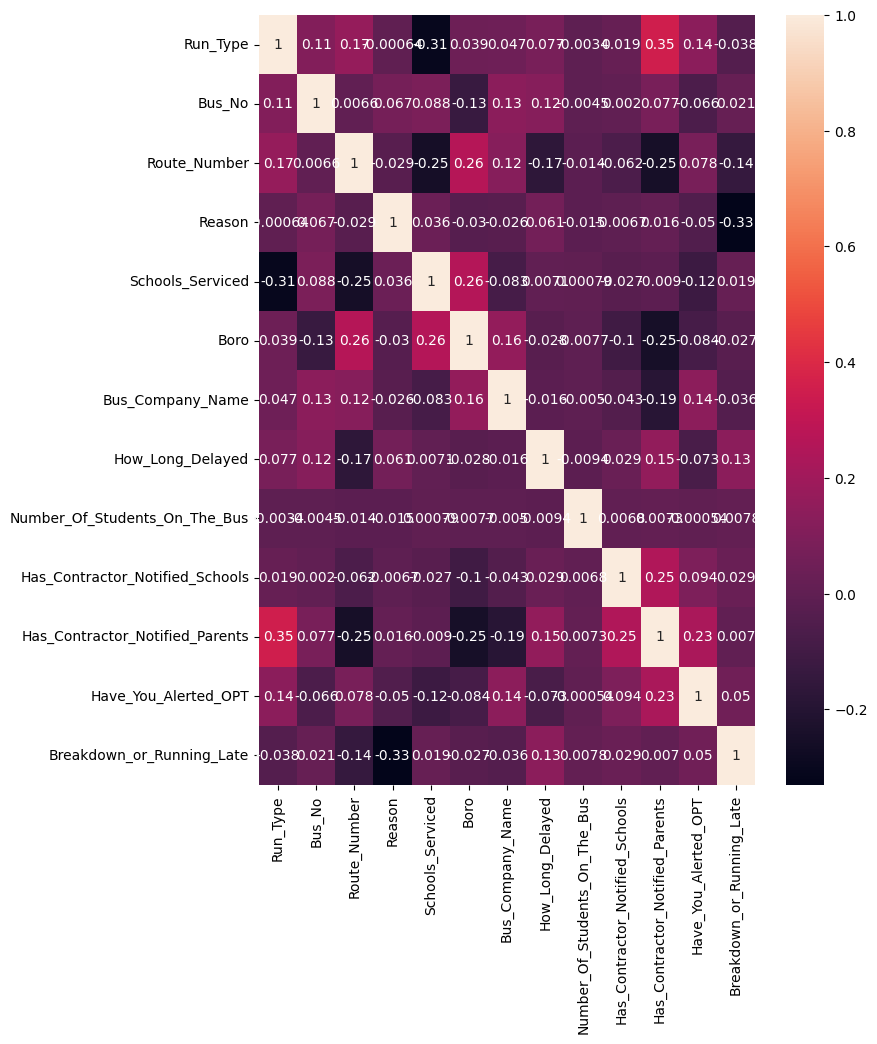

In [ ]:
plt.figure(figsize=(8,10))
sns.heatmap(corr,annot=True)
plt.show()

## Data Preprocessing
This could include:

* **Handle Missing Values**
    * Impute missing values or drop them.

* **Encode Categorical Variables**
    * One-hot encoding
    * Label encoding

* **Scale and Normalize Data**
    * Standardization (Z-score)
    * Min-Max scaling

* **Feature Engineering**
    * Create new features
    * Feature selection

* **Handle Imbalanced Data**
    * Oversampling
    * Undersampling

* **Handle Outliers**
    * Remove outliers
    * Transform outliers

* **Remove Duplicates**
    * Remove redundant or duplicate data


And add more as needed!

Please treat these as suggestions. Feel free to use your judgment for the rest.

here we note the clas 1 more then the class 2 we using somte





## Split the Dataset
Next, split the dataset into training, validation, and testing sets.

In [46]:
X= df.drop('Breakdown_or_Running_Late',axis=1)
y=df['Breakdown_or_Running_Late']

In [47]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [48]:
df['Breakdown_or_Running_Late'].value_counts()

Breakdown_or_Running_Late
1    130857
0     17115
Name: count, dtype: int64

In [51]:

sm=SMOTEENN()
X_train,y_train=sm.fit_resample(X_train,y_train)


In [52]:
df['Breakdown_or_Running_Late'].value_counts()

Breakdown_or_Running_Late
1    130857
0     17115
Name: count, dtype: int64

In [53]:
std=StandardScaler()
s=std.fit_transform(X_train)
#sy=std.transform(y_train)

In [54]:
df.head()

,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Boro,Bus_Company_Name,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Breakdown_or_Running_Late
0,3,7481,77,6,5003,1,27,191,5,1,1,0,1
1,3,8114,77,3,5071,1,27,837,3,1,1,0,1
2,3,4662,209,3,4969,1,27,335,12,1,1,1,1
3,3,4547,209,6,4968,1,27,110,11,1,1,1,1
4,3,4554,209,6,5149,1,27,191,12,1,1,0,1


## Building the ANN Model
In this section, define the architecture of the ANN by specifying the number of layers, neurons, and activation functions.

In [55]:
model = Sequential()

In [56]:
model.add(Dense(units=6,input_dim=X_train.shape[1],activation='relu'))

In [57]:
model.add(Dense(units=6,activation='relu'))

In [58]:
model.add(Dense(units=6,activation='relu'))

In [59]:
model.add(Dense(units=1,activation='sigmoid'))

In [60]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 78        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 6)                 42        
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 169 (676.00 Byte)
Trainable params: 169 (676.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Compile the Model
Compile the ANN model by defining the optimizer, loss function, and evaluation metrics.

In [61]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

## Training the Model
Train the ANN model using the training data.

In [ ]:
histroy =model.fit(X_train,y_train,batch_size=5,epochs=10,verbose=1)

Epoch 1/10
39233/39233 ━━━━━━━━━━━━━━━━━━━━ 126s 3ms/step - accuracy: 0.6178 - loss: 1.4037
Epoch 2/10
39233/39233 ━━━━━━━━━━━━━━━━━━━━ 146s 4ms/step - accuracy: 0.8660 - loss: 0.3375
Epoch 3/10
39233/39233 ━━━━━━━━━━━━━━━━━━━━ 117s 3ms/step - accuracy: 0.8777 - loss: 0.3210
Epoch 4/10
39233/39233 ━━━━━━━━━━━━━━━━━━━━ 105s 2ms/step - accuracy: 0.8889 - loss: 0.2941
Epoch 5/10
39233/39233 ━━━━━━━━━━━━━━━━━━━━ 76s 2ms/step - accuracy: 0.9077 - loss: 0.2471
Epoch 6/10
39233/39233 ━━━━━━━━━━━━━━━━━━━━ 82s 2ms/step - accuracy: 0.9149 - loss: 0.2323
Epoch 7/10
39233/39233 ━━━━━━━━━━━━━━━━━━━━ 81s 2ms/step - accuracy: 0.9263 - loss: 0.2001
Epoch 8/10
39233/39233 ━━━━━━━━━━━━━━━━━━━━ 73s 2ms/step - accuracy: 0.9451 - loss: 0.1605
Epoch 9/10
39233/39233 ━━━━━━━━━━━━━━━━━━━━ 85s 2ms/step - accuracy: 0.9485 - loss: 0.1550
Epoch 10/10
39233/39233 ━━━━━━━━━━━━━━━━━━━━ 79s 2ms/step - accuracy: 0.9511 - loss: 0.1456


In [ ]:
# prompt: explina Epoch 10/10
# 39233/39233 ━━━━━━━━━━━━━━━━━━━━ 79s 2ms/step - accuracy: 0.9511 - loss: 0.1456

# The provided output indicates the final epoch (10 out of 10) of your model's training process.
# Let's break down what it tells us:

# 39233/39233: This shows that all 39233 training samples were processed during this epoch.

# ━━━━━━━━━━━━━━━━━━━━: This visual bar represents the progress of the epoch.
# Since it's filled, the epoch is complete.

# 79s:  The time taken to complete this epoch was 79 seconds.

# 2ms/step:  On average, each step (processing a batch of samples) took 2 milliseconds.

# accuracy: 0.9511:  Your model achieved an accuracy of 95.11% on the training data for this epoch.
# This means it correctly classified approximately 95.11% of the training samples.

# loss: 0.1456: The calculated loss value for this epoch is 0.1456.
# The loss function (binary crossentropy in your case) measures how well your model's predictions
# align with the actual labels. A lower loss generally indicates better performance.


## Evaluate the Model
Evaluate the performance of the model on the test set.

In [ ]:
model.evaluate(X_test,y_test)

925/925 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8652 - loss: 0.3300


[0.34040719270706177, 0.8604156374931335]

## Make Predictions
Use the trained model to make predictions on new or unseen data.

In [ ]:
y_pred =model.predict(X_test)
y_pred_class = (y_pred > 0.5).astype('int32')


925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


## Model Performance Visualization
Visualize the performance metrics such as accuracy and loss over the epochs.

In [ ]:
acc=accuracy_score(y_test,y_pred_class)
print(acc)

In [62]:
histroy1 =model.fit(X_train,y_train,batch_size=1,epochs=3,verbose=1)

Epoch 1/3
196380/196380 [==============================] - 362s 2ms/step - loss: 0.5447 - accuracy: 0.7810
Epoch 2/3
196380/196380 [==============================] - 365s 2ms/step - loss: 0.2324 - accuracy: 0.9127
Epoch 3/3
196380/196380 [==============================] - 369s 2ms/step - loss: 0.2215 - accuracy: 0.9188


In [64]:
model.evaluate(X_test,y_test)

925/925 [==============================] - 2s 1ms/step - loss: 0.3410 - accuracy: 0.8292


[0.3410056233406067, 0.8291941285133362]

In [65]:
y_pred =model.predict(X_test)
y_pred_class = (y_pred > 0.5).astype('int32')

925/925 [==============================] - 1s 1ms/step


AttributeError: 'History' object has no attribute 'histroy1'

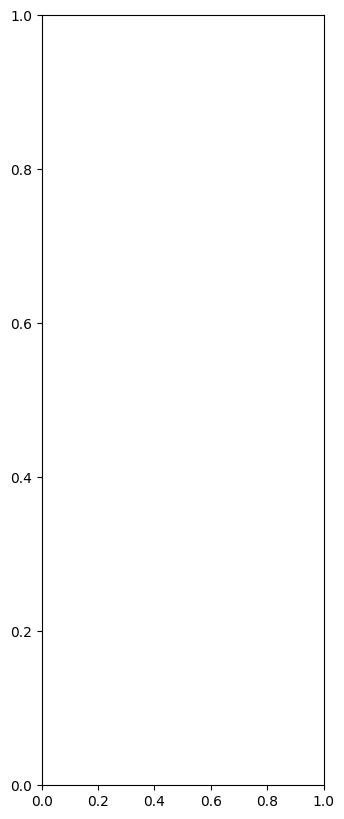

In [71]:
plt.figure(figsize=(8,10))
plt.subplot(1,2,1)
plt.plot(histroy1.histroy1['accuracy'] ,  label= 'train_accuracy')
plt.plot(histroy1.histroy1['val_accuracy'],label='val_accuracy')
plt.title('Model acc')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.legend(['train','validation'],loc='upper left')

plt.subplot(1,2,2)
plt.plot(histroy1.histroy1['loss'],label='train_loss')
plt.plot(histroy1.histroy1['val_loss'],label='val_loss')
plt.title('Model acc')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','validation'],loc='upper left')
plt.show

## Save the Model
Save the trained model for submission.

In [72]:
model.save('myANNCnn.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, encoding). How did these techniques help prepare the data for training the model?
2. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the number of layers, type of layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for the problem at hand?
3. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
4. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics? How do they align with the objective of the task (e.g., regression vs classification)?
5. **Regularization Techniques**: If you used regularization techniques such as dropout or weight decay, explain why you implemented them and how they influenced the model's performance.
6. **Model Evaluation**: Justify your approach to evaluating the model. Why did you choose the specific performance metrics, and how do they reflect the model's success in solving the task?
7. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
8. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?

### Answer Here:

In [ ]:
# for categorical features i fiiled missing values
# i use labelencoder for convert object to numerical and i applid StandardScaler between range (0.1)
#we have 6 nueron networks, two hiddin layer also 6 nueron networks ,the final output activation sigomid classification binary
#cus we predict  the column Breakdown_or_Running_Late
#  After I built the model, we trained it on the data when the number of epochs was 10.
#After that, the connection was cut off and the file was not saved.
#I trained the model again with 3 epochs due to time constraints.
# whene the epochs 10 >> accuracy: 0.9511 on training and loss:0.1456
